<a href="https://colab.research.google.com/github/NguyenQuangHuy2001/AI_CNN/blob/main/CNN_fashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Khai báo thư viện

In [ ]:
from keras.models import Sequential
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import randint
from skimage import color 
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D,Dense,Flatten

Load dữ liệu

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


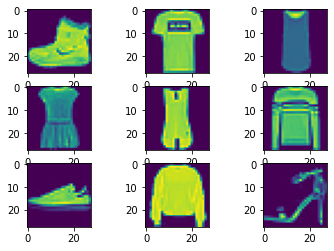

In [ ]:
#Load và phan chia dư liệu
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
print(np.shape(x_train))
print(np.shape(x_test))
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()
X=x_test

Xử lý dữ liệu

In [ ]:
# Xử lý dữ liệu thành 0-1
x_train = x_train.astype('float32')   #chuyen ve so thuc
x_test = x_test.astype('float32')
#xu li du lieu 
x_train/=255.0
x_test/=255.0
#one hot encoding
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

Tạo model

In [ ]:
# MODEL CNN
model = Sequential()
# BLOCK 1
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same' ,input_shape =(28,28,1)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 3
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# Add ANN
model.add(Flatten())
model.add(Dense(128,activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation = 'softmax'))
opt = SGD(lr= 0.01, momentum = 0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Training 

In [ ]:
# # Biên dịch
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 100, batch_size = 256, validation_data = (x_test,y_test), verbose = 1)

Epoch 1/100
235/235 [==============================] - 6s 23ms/step - loss: 2.7564e-05 - accuracy: 1.0000 - val_loss: 0.6650 - val_accuracy: 0.9263
Epoch 2/100
235/235 [==============================] - 5s 21ms/step - loss: 2.6704e-05 - accuracy: 1.0000 - val_loss: 0.6674 - val_accuracy: 0.9260
Epoch 3/100
235/235 [==============================] - 5s 21ms/step - loss: 2.5865e-05 - accuracy: 1.0000 - val_loss: 0.6687 - val_accuracy: 0.9264
Epoch 4/100
235/235 [==============================] - 5s 21ms/step - loss: 2.5067e-05 - accuracy: 1.0000 - val_loss: 0.6710 - val_accuracy: 0.9263
Epoch 5/100
235/235 [==============================] - 5s 21ms/step - loss: 2.4335e-05 - accuracy: 1.0000 - val_loss: 0.6732 - val_accuracy: 0.9262
Epoch 6/100
235/235 [==============================] - 5s 21ms/step - loss: 2.3720e-05 - accuracy: 1.0000 - val_loss: 0.6749 - val_accuracy: 0.9264
Epoch 7/100
235/235 [==============================] - 5s 21ms/step - loss: 2.3019e-05 - accuracy: 1.0000 - val_

Lưu model

In [ ]:
model.save('CNN_FashioMnist.h5')

Vẽ đồ thị độ chính xác

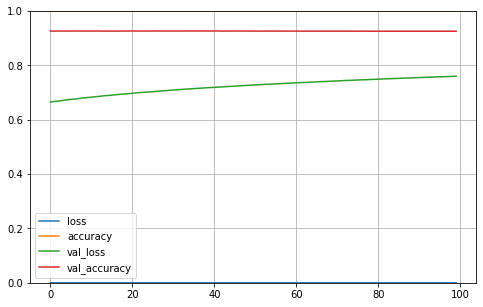

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


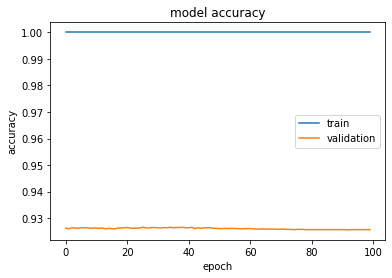

In [ ]:
# Vẽ đồ thị bằng plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upperleft')
plt.show()